In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import zscore, norm, ttest_1samp, sem, poisson, binom, ttest_ind, t
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.distributions.empirical_distribution import ECDF



In [24]:
# Load datasets
books_df = pd.read_csv("large_books.csv")
ratings_df = pd.read_csv("large_ratings.csv")

### What is the probability that a randomly selected book has a rating above 4.5?

#### Using the empirical method

The probability is the proportion of books with an average rating above 4.5:

$$
{P(\text{average\_rating} > 4.5) = \frac{\text{Number of books with average\_rating} > 4.5}{10,000}}
$$


In [6]:
# Count the number of books with average_rating > 4.5
high_rated_books = books_df[books_df['average_rating'] > 4.5]
count_high_rated = len(high_rated_books)

# Divide by the total number of books (10,000)
total_books = len(books_df)
probability = count_high_rated / total_books
print(f"Probability (Empirical Approximation): {probability:.4f}")

Probability (Empirical Approximation): 0.0129


## Analyzing Reviews (Ratings Count)

In [14]:
# Check minimum value of ratings_count
min_rating_count = books_df['ratings_count'].min()
print(f"Minimum ratings_count: {min_rating_count}")
# Check maximum value of ratings_count
max_rating_count = books_df['ratings_count'].max()
print(f"Maximum ratings_count: {max_rating_count}")

Minimum ratings_count: 2716
Maximum ratings_count: 4780653


### If minimum reviews is 2716, what is the likelihood that a book has more than 10000 reviews?

#### Using the empirical method
- Count the number of books with ratings_count > 10,000
- Divide by the total number of books (10,000)

Formular
  $$
P(\text{ratings\_count} > 10,000) = \frac{\text{Number of books with ratings\_count} > 10,000}{10,000}
$$

In [17]:
high_review_books = books_df[books_df['ratings_count'] > 10000]
count_high_reviews = len(high_review_books)
total_books = len(books_df)
empirical_prob = count_high_reviews / total_books
print(f"Probability (Empirical Method): {empirical_prob:.4f}")

Probability (Empirical Method): 0.9198


### How rare is a book with a 5.0 rating?

We want to calculate the percentage of books with a **5.0 average rating** in the dataset.

1. **Define Variables:**
   - Let $ N $ be the total number of books.
   - Let $ M $ be the number of books with an average rating of **5.0**.
   - The probability or percentage of a book having a **5.0 rating** is given by:

$$
P(5.0) = \left( \frac{M}{N} \right) \times 100
$$


### **Example Calculation**
If:
- $ N = 10,000 $ books
- $ M = 3 $ books have a **5.0 rating**

$$
P(5.0) = \left( \frac{3}{10000} \right) \times 100 = 0.03\%
$$

This means only **0.03% of books** have a perfect 5.0 rating, making them **very rare**.

In [6]:
# Ensure 'average_rating' is numeric and handle missing values
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

# Filter books with exactly 5.0 rating
five_star_books = books_df[books_df['average_rating'] == 5.0]

# Calculate rarity
total_books = len(books_df)
rare_count = len(five_star_books)
percentage = (rare_count / total_books) * 100

print(f"Books with 5.0 rating: {rare_count}")
print(f"Rarity: {percentage:.2f}% of all books")

Books with 5.0 rating: 0
Rarity: 0.00% of all books


### If I randomly select 100 books, what will their average rating be?

To estimate the average rating of a random sample of 100 books, we use statistical inference based on the Central Limit Theorem (CLT).

In [9]:
# Clean data
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

# Simulate 10,000 samples of 100 books each
np.random.seed(42)  # For reproducibility
sample_means = [books_df['average_rating'].sample(n=100, replace=False).mean() 
                for _ in range(10_000)]

# Calculate results
simulated_mean = np.mean(sample_means)
simulated_ci = np.percentile(sample_means, [2.5, 97.5])

print(f"Simulated average: {simulated_mean:.3f}")
print(f"95% Confidence Interval: [{simulated_ci[0]:.3f}, {simulated_ci[1]:.3f}]")

Simulated average: 4.002
95% Confidence Interval: [3.951, 4.052]


### If we randomly select 20 books, how many will have ratings above 4.0?

To estimate how many books in a random sample of 20 will have an `average_rating` above 4.0, we combine **empirical probability** and **statistical modeling**. 

#### **Step 1: Calculate the Base Probability**
First, determine the proportion of books in your dataset with `average_rating > 4.0`

#### **Step 2: Model the Expected Count**
The number of books with `rating > 4.0` in a random sample of 20 follows a **binomial distribution**:
- **Expected value**: $ \mu = 20 \times p $
- **Standard deviation**: $ \sigma = \sqrt{20 \times p \times (1 - p)} $

#### **Step 3: Simulate the Distribution (Optional)**
Simulate 10,000 random samples to see the full distribution of possible outcomes.

Proportion of books with rating > 4.0: 51.87% (5187 out of 10000)

Expected number of books > 4.0 in 20: 10.4
Standard deviation: 2.23

Probability of ≥10 books > 4.0: 66.28%
Probability of ≥15 books > 4.0: 2.97%


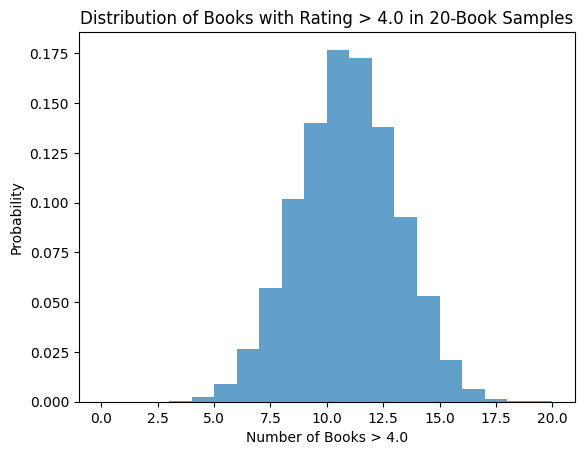

In [10]:
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

# Calculate proportion of books with rating > 4.0
p = (books_df['average_rating'] > 4.0).mean()
total_above_4 = (books_df['average_rating'] > 4.0).sum()

print(f"Proportion of books with rating > 4.0: {p:.2%} ({total_above_4} out of {len(books_df)})")


n_samples = 20
expected = n_samples * p
std_dev = np.sqrt(n_samples * p * (1 - p))

print(f"\nExpected number of books > 4.0 in 20: {expected:.1f}")
print(f"Standard deviation: {std_dev:.2f}")


# Simulate 10,000 trials of 20-book samples
np.random.seed(42)
simulated_counts = np.random.binomial(n=n_samples, p=p, size=10_000)

# Calculate probabilities
prob_10_or_more = (simulated_counts >= 10).mean()
prob_15_or_more = (simulated_counts >= 15).mean()

print(f"\nProbability of ≥10 books > 4.0: {prob_10_or_more:.2%}")
print(f"Probability of ≥15 books > 4.0: {prob_15_or_more:.2%}")

# Plot histogram
plt.hist(simulated_counts, bins=range(n_samples+1), density=True, alpha=0.7)
plt.title("Distribution of Books with Rating > 4.0 in 20-Book Samples")
plt.xlabel("Number of Books > 4.0")
plt.ylabel("Probability")
plt.show()

### If 5 people read a book, how likely is it that at least 4 will rate it 5 stars?
To calculate the probability that at least 4 out of 5 readers will rate a book 4 stars, we use the binomial distribution.

#### Step 1: Calculate the Probability of a 4-Star Rating
First, compute the proportion of all user ratings that are 4 stars.

#### **Step 2: Compute Probability of ≥4/4-Star Ratings**
Use SciPy’s binomial functions to calculate the probability of **at least 4 successes (4 or 5)** in 5 trials.

Probability of a 4-star rating: 0.3579 (2139018 / 5976479)

Probability using survival function: 0.0586 (5.86%)
Probability using PMF sum: 0.0586 (5.86%)


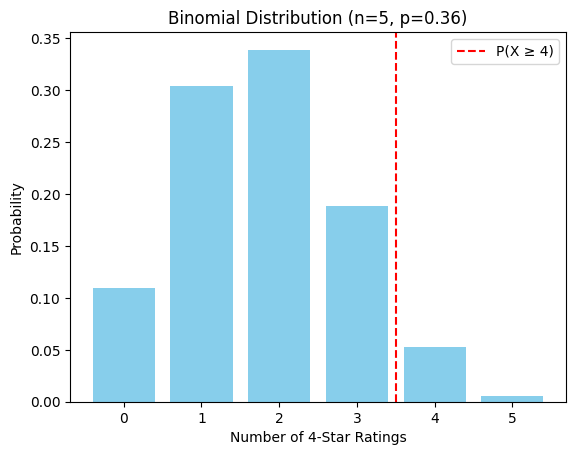

In [16]:
# Clean and validate ratings (assuming ratings are 1-5)
ratings_df['rating'] = pd.to_numeric(ratings_df['rating'], errors='coerce')
ratings_df = ratings_df.dropna(subset=['rating'])

# Calculate probability of a 4-star rating
total_ratings = len(ratings_df)
count_4_star = (ratings_df['rating'] == 4).sum()
p = count_4_star / total_ratings

print(f"Probability of a 4-star rating: {p:.4f} ({count_4_star} / {total_ratings})")

n = 5  # Total readers
k_min = 4  # At least 4 readers rate 4 stars

# Method 1: Survival function (P(X >= 4))
prob_sf = binom.sf(k_min - 1, n, p)  # 1 - CDF(3)

# Method 2: Sum P(X=4) + P(X=5)
prob_pmf = binom.pmf(4, n, p) + binom.pmf(5, n, p)

print(f"\nProbability using survival function: {prob_sf:.4f} ({prob_sf:.2%})")
print(f"Probability using PMF sum: {prob_pmf:.4f} ({prob_pmf:.2%})")

# Visualization (Optional)
# Plot the binomial distribution for context

x = np.arange(0, n+1)
probabilities = binom.pmf(x, n, p)

plt.bar(x, probabilities, color='skyblue')
plt.axvline(k_min - 0.5, color='red', linestyle='--', label=f'P(X ≥ {k_min})')
plt.title(f"Binomial Distribution (n=5, p={p:.2f})")
plt.xlabel("Number of 4-Star Ratings")
plt.ylabel("Probability")
plt.legend()
plt.show()

### What’s the probability that a randomly selected book has a rating between 3.5 and 4.5 stars?

#### 1. Empirical CDF (Non-Parametric)
Directly use the data’s distribution without assuming normality

In [17]:
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

# Calculate P(3.5 ≤ X ≤ 4.5) using empirical CDF
cdf_low = (books_df['average_rating'] <= 3.5).mean()
cdf_high = (books_df['average_rating'] <= 4.5).mean()
probability = cdf_high - cdf_low

print(f"Empirical Probability: {probability:.2%}")

Empirical Probability: 95.16%


####  Parametric CDF (Assume Normal Distribution)
Use the sample mean and standard deviation to model a normal distribution

In [18]:
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

# Calculate mean and standard deviation
mean = books_df['average_rating'].mean()
std = books_df['average_rating'].std()

# Compute probability using normal CDF
cdf_low = norm.cdf(3.5, loc=mean, scale=std)
cdf_high = norm.cdf(4.5, loc=mean, scale=std)
probability = cdf_high - cdf_low

print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Normal Model Probability (3.5–4.5 stars): {probability:.2%}")

Mean: 4.00, Std: 0.25
Normal Model Probability (3.5–4.5 stars): 95.06%


#### Visualization (Optional)
Plot both the empirical and parametric CDFs to compare

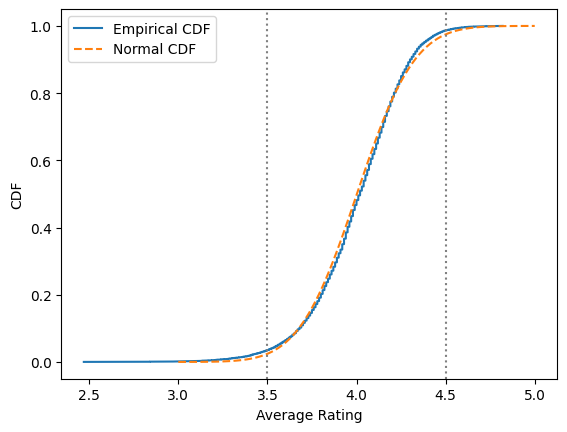

In [19]:
# Empirical CDF
sorted_ratings = np.sort(books_df['average_rating'])
y_empirical = np.arange(1, len(sorted_ratings)+1) / len(sorted_ratings)

# Parametric CDF (Normal)
x_normal = np.linspace(3, 5, 100)
y_normal = norm.cdf(x_normal, mean, std)

plt.plot(sorted_ratings, y_empirical, label='Empirical CDF')
plt.plot(x_normal, y_normal, label='Normal CDF', linestyle='--')
plt.axvline(3.5, color='gray', linestyle=':')
plt.axvline(4.5, color='gray', linestyle=':')
plt.xlabel('Average Rating')
plt.ylabel('CDF')
plt.legend()
plt.show()

### Based on our sample of 10,000 books, what is the range of values within which the true average rating of all books (in the population) likely falls?

Calculating a 95% CI for the Mean Book Rating

In [20]:
# Calculate mean and std
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating'])

mean = books_df['average_rating'].mean()
std = books_df['average_rating'].std()
n = len(books_df)

# Compute 95% CI
confidence_level = 0.95
z_critical = norm.ppf((1 + confidence_level) / 2)  # Z-score for 95% CI
margin_of_error = z_critical * (std / np.sqrt(n))
ci_low = mean - margin_of_error
ci_high = mean + margin_of_error

print(f"95% Confidence Interval: [{ci_low:.3f}, {ci_high:.3f}]")

95% Confidence Interval: [3.997, 4.007]


### Do books published before 2000 have a significantly different average rating than those published after 2000?

To determine if books published before 2000 have a significantly different average rating than those published after 2000, we can use hypothesis testing and confidence intervals.

#### **Step 1: Prepare the Data**
First, split the dataset into two groups:
1. Books published **before 2000**
2. Books published **in or after 2000**

#### **Step 2: Compare Means Statistically**
Use a **two-sample t-test** to determine if the difference in average ratings is statistically significant.

#### **Step 3: Calculate Confidence Intervals**
Compute 95% confidence intervals for both groups to visualize uncertainty.


Mean rating (pre-2000): 4.02
Mean rating (post-2000): 3.99

T-statistic: 7.37, P-value: 0.0000
95% CI (pre-2000): [4.018, 4.032]
95% CI (post-2000): [3.981, 3.995]
Cohen's d: 0.14


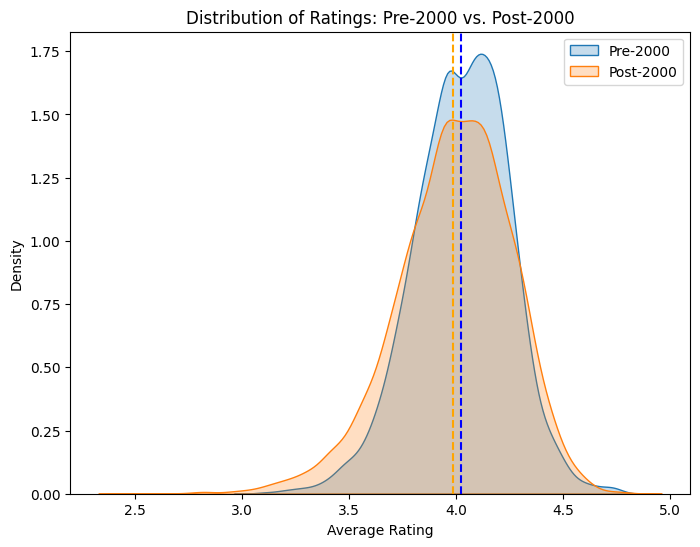

In [26]:
# Clean data
books_df['original_publication_year'] = pd.to_numeric(books_df['original_publication_year'], errors='coerce')
books_df = books_df.dropna(subset=['original_publication_year', 'average_rating'])

# Split into two groups
pre_2000 = books_df[books_df['original_publication_year'] < 2000]
post_2000 = books_df[books_df['original_publication_year'] >= 2000]

# Extract average ratings for both groups
ratings_pre = pre_2000['average_rating']
ratings_post = post_2000['average_rating']

# Perform t-test (assumes unequal variances with Welch's correction)
t_stat, p_value = ttest_ind(ratings_pre, ratings_post, equal_var=False)

print(f"Mean rating (pre-2000): {ratings_pre.mean():.2f}")
print(f"Mean rating (post-2000): {ratings_post.mean():.2f}")
print(f"\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)
    return (mean - t_crit * std_err, mean + t_crit * std_err)

ci_pre = confidence_interval(ratings_pre)
ci_post = confidence_interval(ratings_post)

print(f"95% CI (pre-2000): [{ci_pre[0]:.3f}, {ci_pre[1]:.3f}]")
print(f"95% CI (post-2000): [{ci_post[0]:.3f}, {ci_post[1]:.3f}]")

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx-1)*np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(ratings_pre, ratings_post)
print(f"Cohen's d: {d:.2f}")


plt.figure(figsize=(8, 6))
sns.kdeplot(ratings_pre, label='Pre-2000', fill=True)
sns.kdeplot(ratings_post, label='Post-2000', fill=True)
plt.axvline(ratings_pre.mean(), color='blue', linestyle='--')
plt.axvline(ratings_post.mean(), color='orange', linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings: Pre-2000 vs. Post-2000')
plt.legend()
plt.show()

### How precise is our estimate of the mean rating for books with fewer than 4000 reviews?

To determine the precision of the mean rating estimate for books with fewer than 4000 reviews, we calculate a **confidence interval (CI)** around the sample mean.

#### **Step 1: Filter the Data**
First, isolate books with `<4000` ratings and compute their mean and variability:

#### **Step 2: Compute the Confidence Interval**
For large samples (n ≥ 30), use the **Z-distribution** (95% confidence level).
For small samples (n < 30), use the **t-distribution**.

In [28]:
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'], errors='coerce')
books_df['ratings_count'] = pd.to_numeric(books_df['ratings_count'], errors='coerce')
books_df = books_df.dropna(subset=['average_rating', 'ratings_count'])

# Filter books with <4000 reviews
subset = books_df[books_df['ratings_count'] < 4000]
n = len(subset)
mean = subset['average_rating'].mean()
std = subset['average_rating'].std(ddof=1)  # Sample standard deviation

print(f"Sample size (n): {n}")
print(f"Mean rating: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")

confidence_level = 0.95

if n < 30:
    t_critical = t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_critical * (std / np.sqrt(n))
    ci_low = mean - margin_of_error
    ci_high = mean + margin_of_error
    print(f"95% Confidence Interval (t): [{ci_low:.3f}, {ci_high:.3f}]")
else:
    z_critical = norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_critical * (std / np.sqrt(n))
    ci_low = mean - margin_of_error
    ci_high = mean + margin_of_error
    print(f"95% Confidence Interval (Z): [{ci_low:.3f}, {ci_high:.3f}]")

Sample size (n): 6
Mean rating: 4.26
Standard deviation: 0.34
95% Confidence Interval (t): [3.901, 4.619]


## Comprehensive Analysis Pipeline

This section documents the end-to-end analysis of book ratings data, answering questions about popularity, rating distributions, and statistical significance. Below is a breakdown of the pipeline:

---

#### 1. **Data Integration**
**Purpose**: Combine ratings data with book metadata to enable title-based analysis.  
**Key Insight**: Merging `ratings_df` (user ratings) with `books_df` (book titles) allows analysis of ratings by book title.

---

#### 2. **Dataset Overview**
**Purpose**: Understand the scale and structure of the datasets.  
**Key Insight**: The ratings dataset is significantly larger, reflecting user engagement across books.

---

#### 3. **Book Statistics Calculation**
**Purpose**: Compute aggregate metrics for each book.
**Key Insight**: 
- Identifies highly rated books (`book_avg_ratings`).
- Highlights books with controversial/polarizing ratings (`book_rating_std`).

---

#### 4. **Popularity Analysis**
**Purpose**: Identify the most-reviewed books.  
**Key Insight**: Popularity (ratings count) does not necessarily correlate with high average ratings.

---

#### 5. **Sampling Distribution & Central Limit Theorem**
**Purpose**: Visualize how sample means of ratings distribute around the true mean.  
**Key Insight**: The sampling distribution approximates normality, validating the use of parametric tests.

---

#### 6. **Confidence Interval Estimation**
**Purpose**: Quantify uncertainty in the average rating estimate of a book.  
**Key Insight**: Narrow confidence intervals indicate high confidence in the estimated average rating.

---

#### 7. **Hypothesis Testing**
**Purpose**: Test if a book\’s rating is statistically different from a benchmark (e.g., 4.0).  
**Key Insight**: Low p-values (<0.05) indicate significant deviations from the benchmark.

---

#### 8. **Distribution Analysis**
##### A. **Normal Distribution Fit**
**Purpose**: Check if individual book ratings follow a normal distribution.  
**Key Insight**: Ratings often skew slightly left (higher average ratings).

##### B. **Poisson Distribution Fit**
**Purpose**: Model the distribution of ratings count per book.  
**Key Insight**: The Poisson model may underestimate the heavy tail of highly rated books.

---

#### 9. **Key Insights**
1. **Popularity vs. Quality**: The most-reviewed books (e.g., *The Hunger Games*) may not have the highest average ratings.  
2. **Statistical Significance**: Even small differences in average ratings (e.g., 4.3 vs. 4.0) can be statistically significant due to large sample sizes.  
3. **Rating Behavior**: User ratings often cluster around 4–5 stars, deviating from normality.  

---

Books Dataset: 9979 rows
Ratings Dataset: 5976479 rows

Top 10 Books with Most Ratings:
title
The Hunger Games (The Hunger Games, #1)                        22806
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       21850
To Kill a Mockingbird                                          19088
Twilight (Twilight, #1)                                        16931
The Great Gatsby                                               16604
Catching Fire (The Hunger Games, #2)                           16549
Mockingjay (The Hunger Games, #3)                              15953
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    15855
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     15657
The Hobbit                                                     15558
Name: rating, dtype: int64


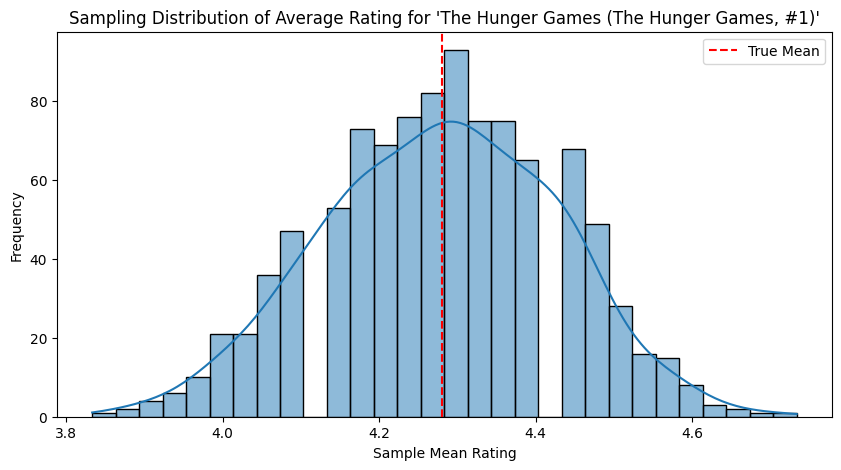


95% Confidence Interval for 'The Hunger Games (The Hunger Games, #1)': (4.27, 4.29)

Hypothesis Test for 'The Hunger Games (The Hunger Games, #1)':
T-statistic: 48.626, P-value: 0.000
Reject H0: 'The Hunger Games (The Hunger Games, #1)' has a significantly higher rating than 4.0


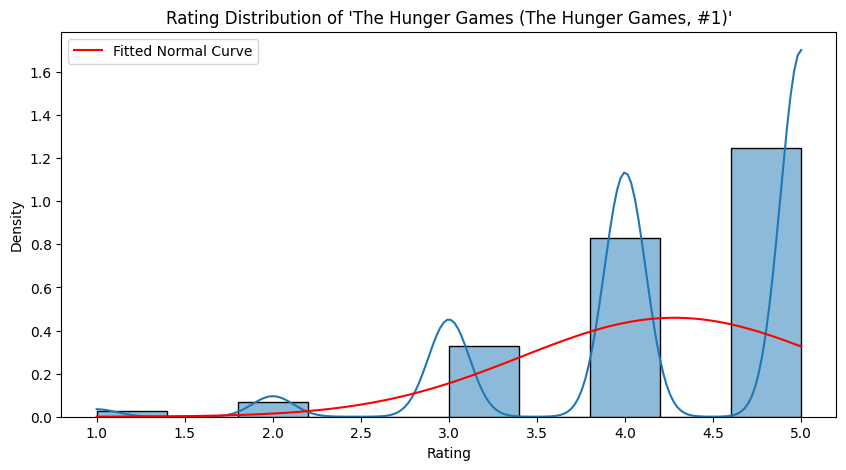

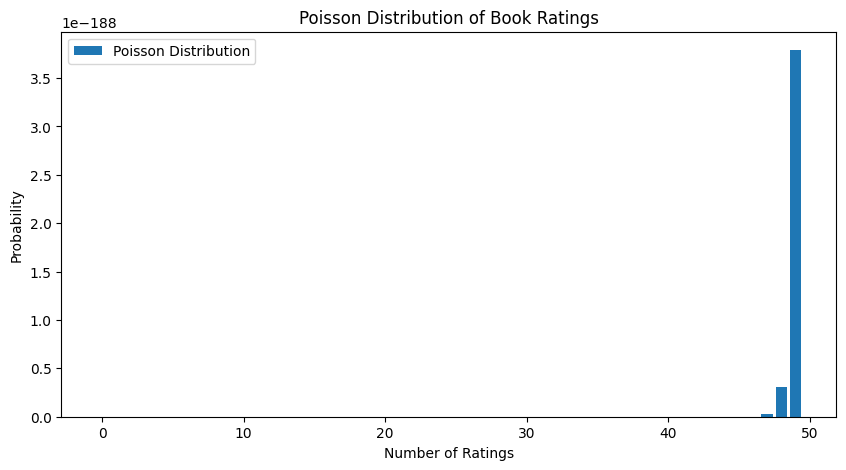

In [33]:
# Display dataset info
print(f"Books Dataset: {books_df.shape[0]} rows")
print(f"Ratings Dataset: {ratings_df.shape[0]} rows")

#Merge datasets to get book titles with ratings
df = ratings_df.merge(books_df[['book_id', 'title']], on='book_id')

# Compute basic statistics
book_avg_ratings = df.groupby("title")["rating"].mean()
book_rating_std = df.groupby("title")["rating"].std()
book_rating_count = df.groupby("title")["rating"].count()

# Display top 10 books with most ratings
top_books = book_rating_count.sort_values(ascending=False).head(10)
print("\nTop 10 Books with Most Ratings:")
print(top_books)

# Select a popular book
book_title = top_books.index[0]  # Most rated book

# Extract ratings for the selected book
book_ratings = df[df["title"] == book_title]["rating"].dropna()

# Sampling Distribution of the Mean
sample_size = 30
num_samples = 1000

# Generate multiple samples and compute means
sample_means = [np.mean(np.random.choice(book_ratings, size=sample_size, replace=True)) for _ in range(num_samples)]

# Plot Sampling Distribution
plt.figure(figsize=(10, 5))
sns.histplot(sample_means, kde=True, bins=30)
plt.axvline(np.mean(book_ratings), color='red', linestyle='dashed', label="True Mean")
plt.title(f"Sampling Distribution of Average Rating for '{book_title}'")
plt.xlabel("Sample Mean Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Compute 95% Confidence Interval
sample_mean = np.mean(book_ratings)
sample_sem = sem(book_ratings)
ci_lower, ci_upper = sample_mean - 1.96 * sample_sem, sample_mean + 1.96 * sample_sem

print(f"\n95% Confidence Interval for '{book_title}': ({ci_lower:.2f}, {ci_upper:.2f})")

# Hypothesis Testing: Is the book rating higher than 4.0?
t_stat, p_value = ttest_1samp(book_ratings, 4.0)

print(f"\nHypothesis Test for '{book_title}':")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print(f"Reject H0: '{book_title}' has a significantly higher rating than 4.0")
else:
    print(f"Fail to reject H0: No significant evidence that '{book_title}' has a rating higher than 4.0")

# Plot Normal Distribution Fit for Book Ratings
mu, sigma = norm.fit(book_ratings)

plt.figure(figsize=(10,5))
sns.histplot(book_ratings, kde=True, bins=10, stat="density")
x = np.linspace(min(book_ratings), max(book_ratings), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color="red", label="Fitted Normal Curve")
plt.title(f"Rating Distribution of '{book_title}'")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()

# Poisson Distribution: Number of Ratings per Book
lambda_ = np.mean(book_rating_count)
x = np.arange(0, max(book_rating_count))
poisson_pmf = poisson.pmf(x, lambda_)

plt.figure(figsize=(10,5))
plt.bar(x[:50], poisson_pmf[:50], label="Poisson Distribution")  # Limiting to 50 books for clarity
plt.xlabel("Number of Ratings")
plt.ylabel("Probability")
plt.title("Poisson Distribution of Book Ratings")
plt.legend()
plt.show()


Estimated Average Rating: 3.84

95% Confidence Interval: (3.62, 4.06)


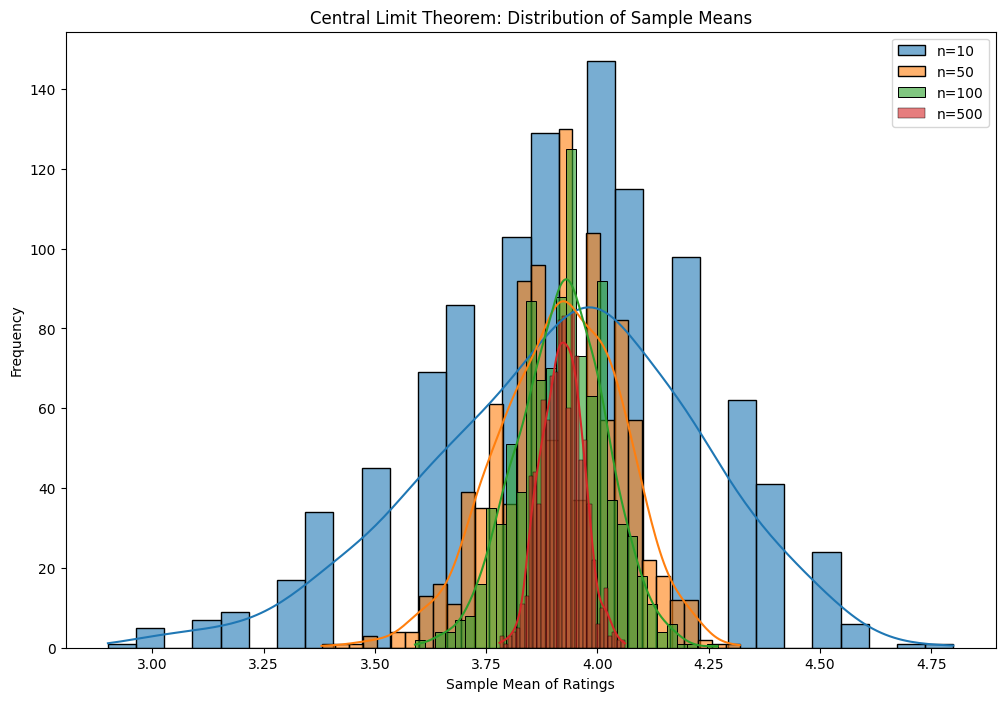


T-statistic: 7.37, P-value: 0.0000
Reject H0: Pre-2000 books have significantly different ratings.

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:         average_rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.57
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           9.54e-06
Time:                        01:24:28   Log-Likelihood:                -480.89
No. Observations:                9979   AIC:                             967.8
Df Residuals:                    9976   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025  

In [11]:
# Drop rows with missing values
books_df = books_df.dropna(subset=["ratings_count", "original_publication_year", "average_rating"])

# --- POINT ESTIMATION ---
sample_ratings = ratings_df["rating"].sample(100, random_state=42)
estimated_mean = sample_ratings.mean()
print(f"\nEstimated Average Rating: {estimated_mean:.2f}")

# --- CONFIDENCE INTERVAL ---
sample_size = len(sample_ratings)
sample_mean = sample_ratings.mean()
sample_std = sample_ratings.std(ddof=1)  # Use sample standard deviation

z_score = norm.ppf(0.975)  # 95% CI
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
print(f"\n95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

# --- CENTRAL LIMIT THEOREM ---
def sample_means(data, sample_size, num_samples=1000):
    return [np.mean(np.random.choice(data, size=sample_size, replace=True)) for _ in range(num_samples)]

sample_sizes = [10, 50, 100, 500]
sampled_means = {size: sample_means(ratings_df['rating'], sample_size=size) for size in sample_sizes}  # Fix typo: ratings -> ratings_df

plt.figure(figsize=(12, 8))
for size in sample_sizes:
    sns.histplot(sampled_means[size], bins=30, kde=True, label=f"n={size}", alpha=0.6)
plt.xlabel("Sample Mean of Ratings")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem: Distribution of Sample Means")
plt.legend()
plt.show()

# --- HYPOTHESIS TESTING: DO BOOKS PUBLISHED BEFORE 2000 HAVE HIGHER RATINGS? ---
if "original_publication_year" in books_df.columns:
    pre_2000 = books_df[books_df["original_publication_year"] < 2000]["average_rating"]
    post_2000 = books_df[books_df["original_publication_year"] >= 2000]["average_rating"]
    
    t_stat, p_value = ttest_ind(pre_2000.dropna(), post_2000.dropna(), equal_var=False)
    print(f"\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Reject H0: Pre-2000 books have significantly different ratings.")
    else:
        print("Fail to reject H0: No significant difference in ratings.")
else:
    print("\n'Skipping hypothesis test: 'original_publication_year' column missing.")
# --- REGRESSION ANALYSIS ---
if {"ratings_count", "original_publication_year", "average_rating"}.issubset(books_df.columns):
    X = books_df[["ratings_count", "original_publication_year"]]
    y = books_df["average_rating"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print("\nRegression Model Summary:")
    print(model.summary())
else:
    print("\nSkipping regression: Required columns missing.")

# --- END ---
print("\nAnalysis Complete.")

### Which books are outliers in popularity (extremely high/low ratings count)?

In [12]:
# Z-score method
z_scores = stats.zscore(books_df['ratings_count'])
outliers = books_df[(z_scores > 3) | (z_scores < -3)]
print(f"Outliers:\n{outliers[['title', 'ratings_count']]}")

Outliers:
                                                 title  ratings_count
0              The Hunger Games (The Hunger Games, #1)        4780653
1    Harry Potter and the Sorcerer's Stone (Harry P...        4602479
2                              Twilight (Twilight, #1)        3866839
3                                To Kill a Mockingbird        3198671
4                                     The Great Gatsby        2683664
..                                                 ...            ...
118                                The Handmaid's Tale         607889
127                                         Steve Jobs         560715
133         City of Glass (The Mortal Instruments, #3)         593173
138  Miss Peregrine’s Home for Peculiar Children (M...         613674
152         City of Ashes (The Mortal Instruments, #2)         541117

[108 rows x 2 columns]


### Is there a "popularity bias" where highly-rated books are simply popular, not high-quality?

Check correlation between ratings_count and average_rating.

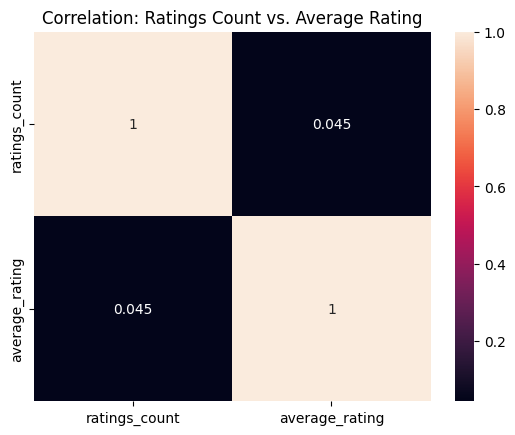

In [13]:
corr = books_df[['ratings_count', 'average_rating']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation: Ratings Count vs. Average Rating")
plt.show()

### Are most books niche (with few ratings), or are there a few "blockbusters" dominating the dataset?

Use histograms or kernel density plots to visualize skewness.

Calculate metrics like the Gini coefficient or Pareto principle (e.g., "Do the top 20% of books account for 80% of all ratings?").

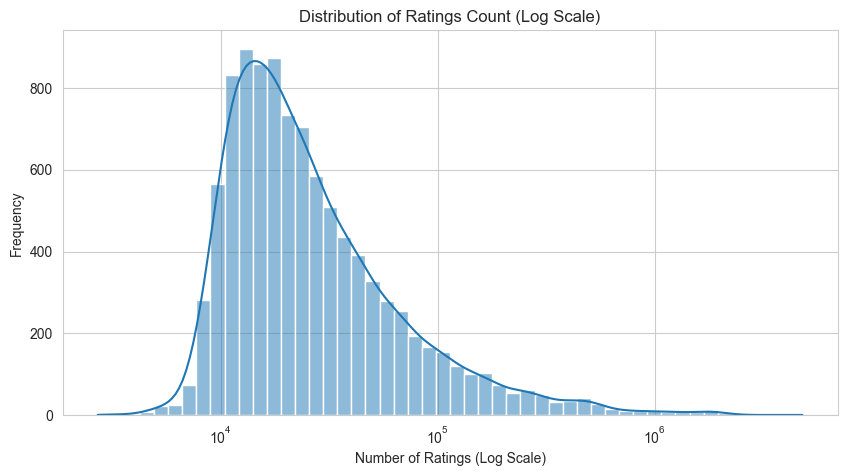

Top 20% books account for 69.6% of all ratings.


In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(books_df['ratings_count'], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Ratings Count (Log Scale)")
plt.xlabel("Number of Ratings (Log Scale)")
plt.ylabel("Frequency")
plt.show()

# Pareto check
sorted_counts = books_df['ratings_count'].sort_values(ascending=False)
top_20_percent = sorted_counts.head(int(len(sorted_counts) * 0.2)).sum()
total_ratings = sorted_counts.sum()
print(f"Top 20% books account for {top_20_percent / total_ratings:.1%} of all ratings.")

### How many books have too few ratings to trust their average rating?

Identify books with ratings_count < threshold (e.g., <5000 ratings).

Compare their average ratings to books with more ratings.

In [21]:
low_rating_books = books_df[books_df['ratings_count'] < 5000]
high_rating_books = books_df[books_df['ratings_count'] >= 5000]

print(f"Books with <5000 ratings: Mean = {low_rating_books['average_rating'].mean():.2f}")
print(f"Books with ≥5000 ratings: Mean = {high_rating_books['average_rating'].mean():.2f}")

# Hypothesis test for difference in means
t_stat, p_value = stats.ttest_ind(
    low_rating_books['average_rating'].dropna(),
    high_rating_books['average_rating'].dropna(),
    equal_var=False
)
print(f"\nP-value for difference: {p_value:.4f}")

Books with <5000 ratings: Mean = 4.09
Books with ≥5000 ratings: Mean = 4.00

P-value for difference: 0.2539


### The PDF (Probability Density Function) and CDF (Cumulative Distribution Function) of ratings_count (number of ratings per book) can answer critical questions about book popularity, user engagement, and data distribution.

---

### **Key Questions Answered by PDF**
1. **What is the typical range of ratings counts?**  
   - *Example*: "Do most books have fewer than 100 ratings, or are ratings counts widely distributed?"  
   - **Insight**: The PDF shows spikes or peaks in common ratings counts (e.g., most books have 10–100 ratings).

2. **Are there outliers in popularity?**  
   - *Example*: "Is there a long tail of books with extremely high ratings counts (e.g., >10,000 ratings)?"  
   - **Insight**: A long-tailed PDF indicates a few "blockbuster" books dominate the ratings.

3. **Does the data follow a known distribution?**  
   - *Example*: "Is the distribution of ratings counts exponential, power-law, or Poisson?"  
   - **Insight**: Helps model user engagement patterns (e.g., power-law suggests extreme inequality in popularity).

---

### **Key Questions Answered by CDF**
1. **What percentage of books have fewer than X ratings?**  
   - *Example*: "What fraction of books have fewer than 50 ratings?"  
   - **Answer**: Read \( P(\text{ratings_count} \leq 50) \) directly from the CDF.  
   - **Use Case**: Identify under-reviewed books needing promotion.

2. **What is the median/percentile ratings count?**  
   - *Example*: "What ratings count separates the top 10% of books?"  
   - **Answer**: Find \( X \) where \( \text{CDF}(X) = 0.9 \).  

3. **How unequal is popularity across books?**  
   - *Example*: "Do the top 20% of books account for 80% of all ratings?"  
   - **Answer**: Compare the CDF curve to the Pareto principle (80-20 rule).

---

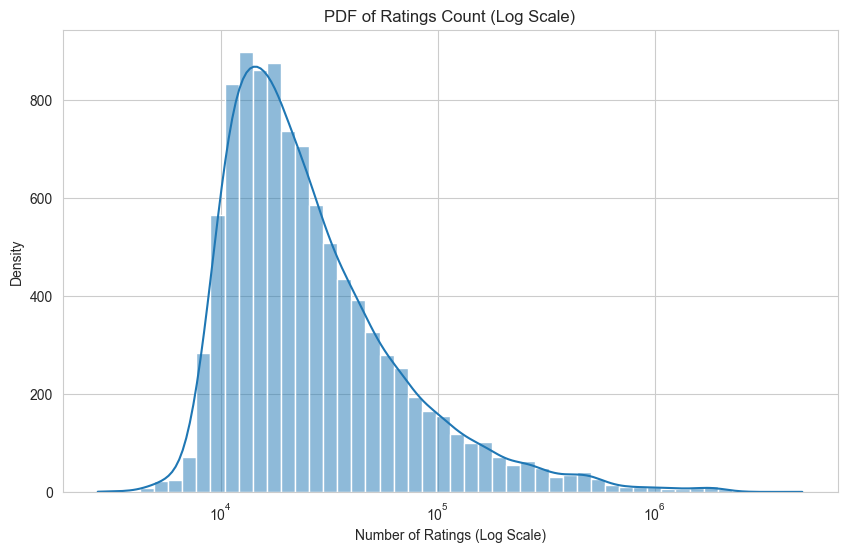

Outlier threshold (IQR method): 82,281 ratings
Number of outliers: 1163


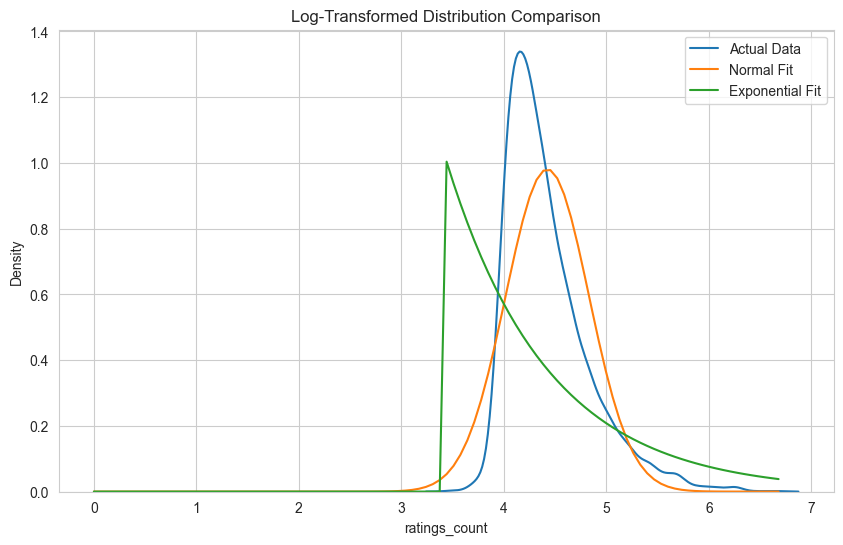


0.0% of books have ≤50 ratings
25th percentile: 13,569 ratings
50th percentile: 21,156 ratings
75th percentile: 41,054 ratings
90th percentile: 94,103 ratings

Top 20% of books account for 69.6% of all ratings


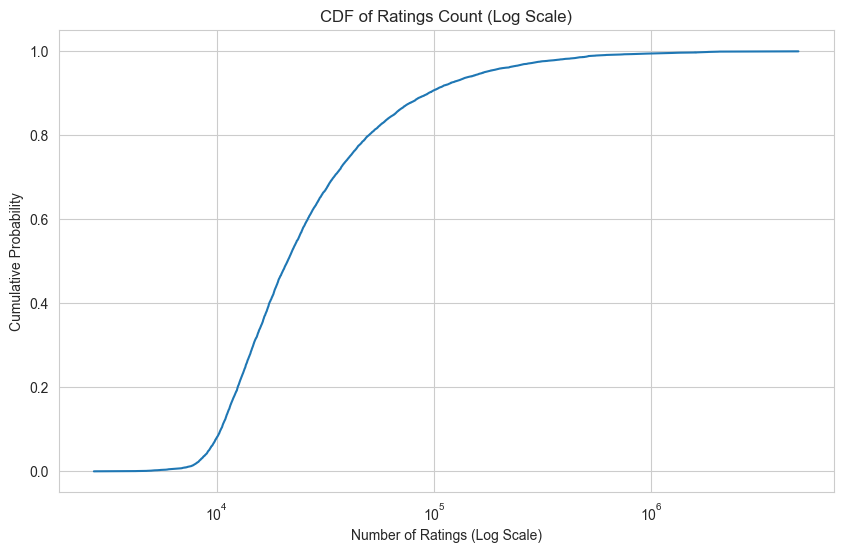

In [25]:

# Preprocess ratings_count
ratings_count = books_df['ratings_count'].dropna()

# =================================================================
# PDF Analysis
# =================================================================

# Q1: Typical range of ratings counts
plt.figure(figsize=(10, 6))
sns.histplot(ratings_count, bins=50, kde=True, log_scale=True)
plt.title("PDF of Ratings Count (Log Scale)")
plt.xlabel("Number of Ratings (Log Scale)")
plt.ylabel("Density")
plt.show()

# Q2: Identify outliers
Q1 = ratings_count.quantile(0.25)
Q3 = ratings_count.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
print(f"Outlier threshold (IQR method): {outlier_threshold:,.0f} ratings")
print(f"Number of outliers: {(ratings_count > outlier_threshold).sum()}")

# Q3: Compare with known distributions
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(np.log10(ratings_count[ratings_count > 0]), label='Actual Data', ax=ax)

# Plot theoretical distributions
x = np.linspace(0, np.log10(ratings_count.max()), 100)
ax.plot(x, stats.norm.pdf(x, *stats.norm.fit(np.log10(ratings_count))), 
         label='Normal Fit')
ax.plot(x, stats.expon.pdf(x, *stats.expon.fit(np.log10(ratings_count))), 
         label='Exponential Fit')
plt.title("Log-Transformed Distribution Comparison")
plt.legend()
plt.show()

# =================================================================
# CDF Analysis
# =================================================================

# Create ECDF
ecdf = ECDF(ratings_count)

# Q1: Percentage with fewer than X ratings
threshold = 50
pct_below = ecdf(threshold) * 100
print(f"\n{round(pct_below, 1)}% of books have ≤{threshold} ratings")

# Q2: Percentile values
percentiles = [25, 50, 75, 90]
values = np.percentile(ratings_count, percentiles)
for p, v in zip(percentiles, values):
    print(f"{p}th percentile: {v:,.0f} ratings")

# Q3: Pareto principle check
sorted_counts = ratings_count.sort_values(ascending=False)
top_20_pct = sorted_counts.head(int(len(sorted_counts) * 0.2))
pct_total = top_20_pct.sum() / sorted_counts.sum() * 100
print(f"\nTop 20% of books account for {pct_total:.1f}% of all ratings")

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(np.sort(ratings_count), ecdf(np.sort(ratings_count)))
plt.xscale('log')
plt.title("CDF of Ratings Count (Log Scale)")
plt.xlabel("Number of Ratings (Log Scale)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()

## Rating Distribution of Three books

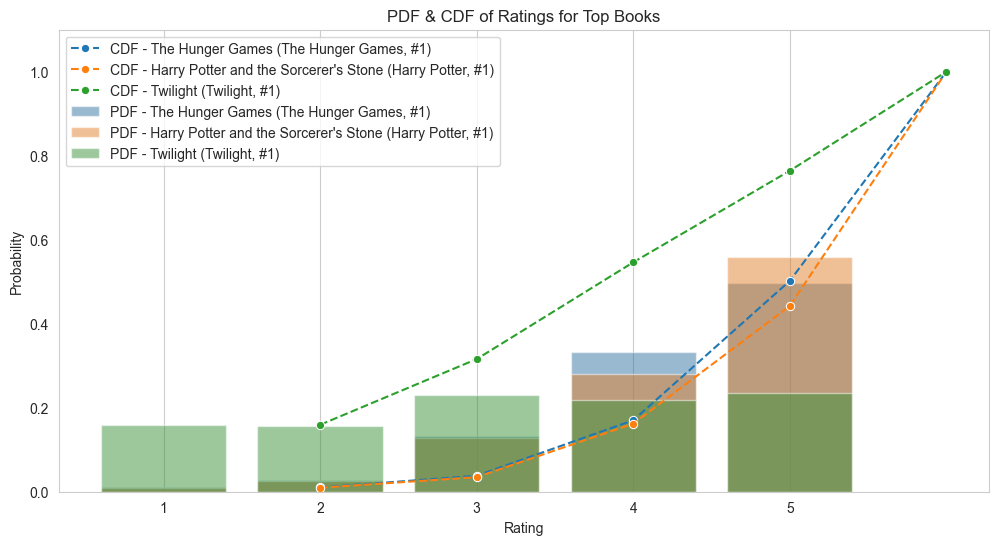

In [26]:

# Select 3 books based on the highest number of ratings
top_books = books_df.nlargest(3, 'ratings_count')

# Extract ratings for the selected books
book_ratings = {}
for _, row in top_books.iterrows():
    book_id = row["book_id"]
    title = row["title"]
    ratings = ratings_df[ratings_df["book_id"] == book_id]["rating"].tolist()
    book_ratings[title] = ratings

# Plot PDF & CDF
plt.figure(figsize=(12, 6))

for book, ratings in book_ratings.items():
    rating_values = np.arange(1, 6)  # Possible ratings {1, 2, 3, 4, 5}
    rating_counts = np.bincount(ratings, minlength=6)[1:]  # Ignore index 0
    pdf_values = rating_counts / np.sum(rating_counts)  # Normalize to get PDF
    cdf_values = np.cumsum(pdf_values)  # Compute CDF

    # Plot PDF
    sns.barplot(x=rating_values, y=pdf_values, alpha=0.5, label=f"PDF - {book}")

    # Plot CDF
    sns.lineplot(x=rating_values, y=cdf_values, marker="o", linestyle="--", label=f"CDF - {book}")

# Labels & Legends
plt.title("PDF & CDF of Ratings for Top Books")
plt.xlabel("Rating")
plt.ylabel("Probability")
plt.ylim(0, 1.1)
plt.legend()
plt.grid()

# Show plot
plt.show()


## Visualizing Normal Distribution in User Ratings

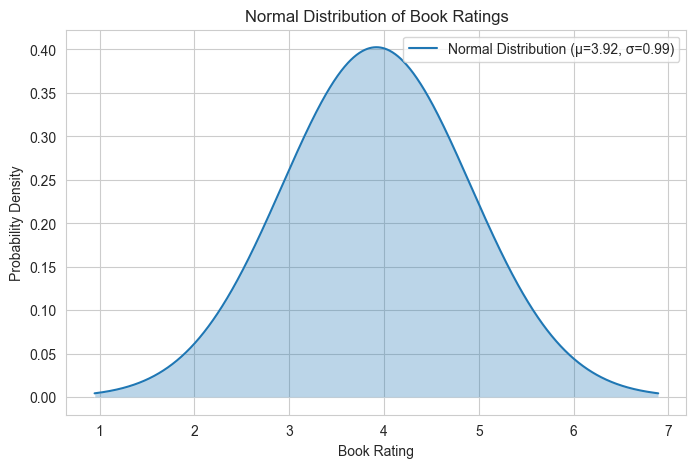

Mean (μ): 3.92
Standard Deviation (σ): 0.99


In [27]:
from scipy.stats import norm

# Compute mean (μ) and standard deviation (σ) from actual ratings
mu = ratings_df["rating"].mean()
sigma = ratings_df["rating"].std()

# Generate values for x-axis (rating range)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Compute normal probability density function (PDF)
pdf_values = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, label=f'Normal Distribution (μ={mu:.2f}, σ={sigma:.2f})')
plt.fill_between(x, pdf_values, alpha=0.3)  # Shade the area under the curve
plt.xlabel('Book Rating')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Book Ratings')
plt.legend()
plt.show()

# Print actual values
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")
